# STAT201 Project Proposal -- Bike Sharing #

# Introducton #

 - The dataset that we have decided to work on for our project is the **Bike Sharing Dataset**. This dataset contains the hourly and daily count of rental bikes between 2011 and 2012 in the Capital bikeshare system with the corresponding weather and seasonal information. The variables that we have decided to focus on for the purpose of our project are weekday, workingday, cnt, casual, and registered variables. 

- Our **research question** is; Is there a significant difference in bike rental users during workdays or non-workdays? We will be using the columns cnt (total number of users that day), and workingday (0 meaning not a working day, 1 meaning it is a working day). 

- In the study done by ShuiChao Zhang et al, it was found that rental duration between weekdays and weekends are **similar**. However, in the study done by Yang et al, the survey results show that there is a **decrease** in use of bikes during holidays.

- We are going to estimate the **population means** for our local parameter for both workingday and non-working day using 1000 bootstrap samples generated from one sample. Bootstrapping will help us induce sampling variation with one sample to replicate effects of sampling from a population. We decided to use Mean as our sample size is quite large so we can apply the central limit theorem and overall the distribution of the data is symmetrical.

- We have decided to use **standard deviation** as our scale parameter as we believe that using distributing the data based on standard deviation will easily allow us to identify any outliers in the data, identify how widely the data is spread around the mean value, and it provides a better variability as compared to range because it gives the measure of variation of the values from the mean of the dataset.

- Understanding if there are more users during workdays or non-workdays can help the company effectively allocate resources to days where there are more users. It can help them predict if there are days that more resources are required from consumers.


## Preliminary Results ## 

In [1]:
# loading the library
library(tidyverse)
library(repr)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# prepare environment
# default_plot_width <- 7
# default_plot_height <- 7
default_plot_width <- 10
default_plot_height <- 10
set.seed(1)

options(repr.matrix.max.rows = 6)
options(repr.plot.width = default_plot_width, repr.plot.height = default_plot_height)
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

# some constants
# SAMPLE_SIZE = 731 # MAX 731
SAMPLE_SIZE = 73 # 731 * 0.1
confidence_level = 0.95

In [3]:
# Clean and wrangle the data

# download zip file
zipFileUrl <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
temp <- tempfile()
download.file(zipFileUrl, temp)
# get the raw data
rawData <- read.csv(unz(temp, "hour.csv"))
unlink(temp)
# above code consult: https://stackoverflow.com/questions/3053833/using-r-to-download-zipped-data-file-extract-and-import-data
head(rawData)

# generate one sample
BikeSharingData <- rawData %>%
    group_by(dteday) %>%
    summarize(cnt = sum(cnt), workingday=mean(workingday)) %>%
    ungroup() %>%
    select(workingday, cnt) %>%
    mutate(isworkingday = (workingday == 1)) %>%
    mutate(isworkingday = as.factor(isworkingday)) %>%
    rep_sample_n(size = SAMPLE_SIZE) %>%
    ungroup() %>%
    select(isworkingday, cnt)

nrow(BikeSharingData)
head(BikeSharingData)

workingday_BikeSharingData <- filter(BikeSharingData, isworkingday=="TRUE") %>% select(cnt)
notworkingday_BikeSharingData <- filter(BikeSharingData, isworkingday=="FALSE") %>% select(cnt)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


[1] 73

isworkingday,cnt
<fct>,<int>
TRUE,5992
TRUE,4362
TRUE,5260
FALSE,7132
TRUE,3894
TRUE,4120


Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


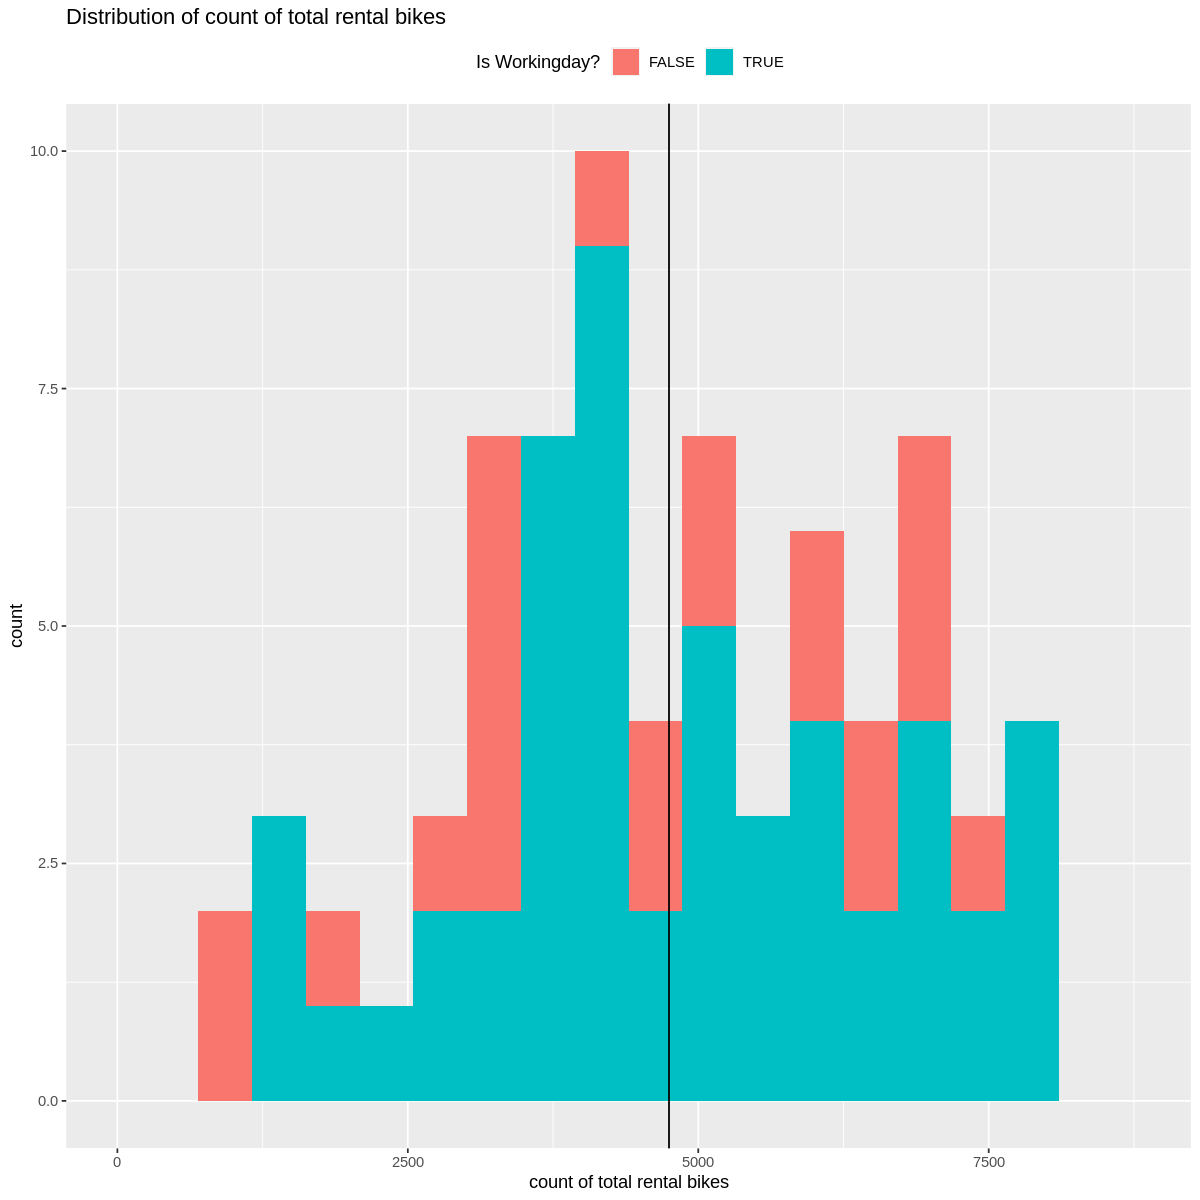

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


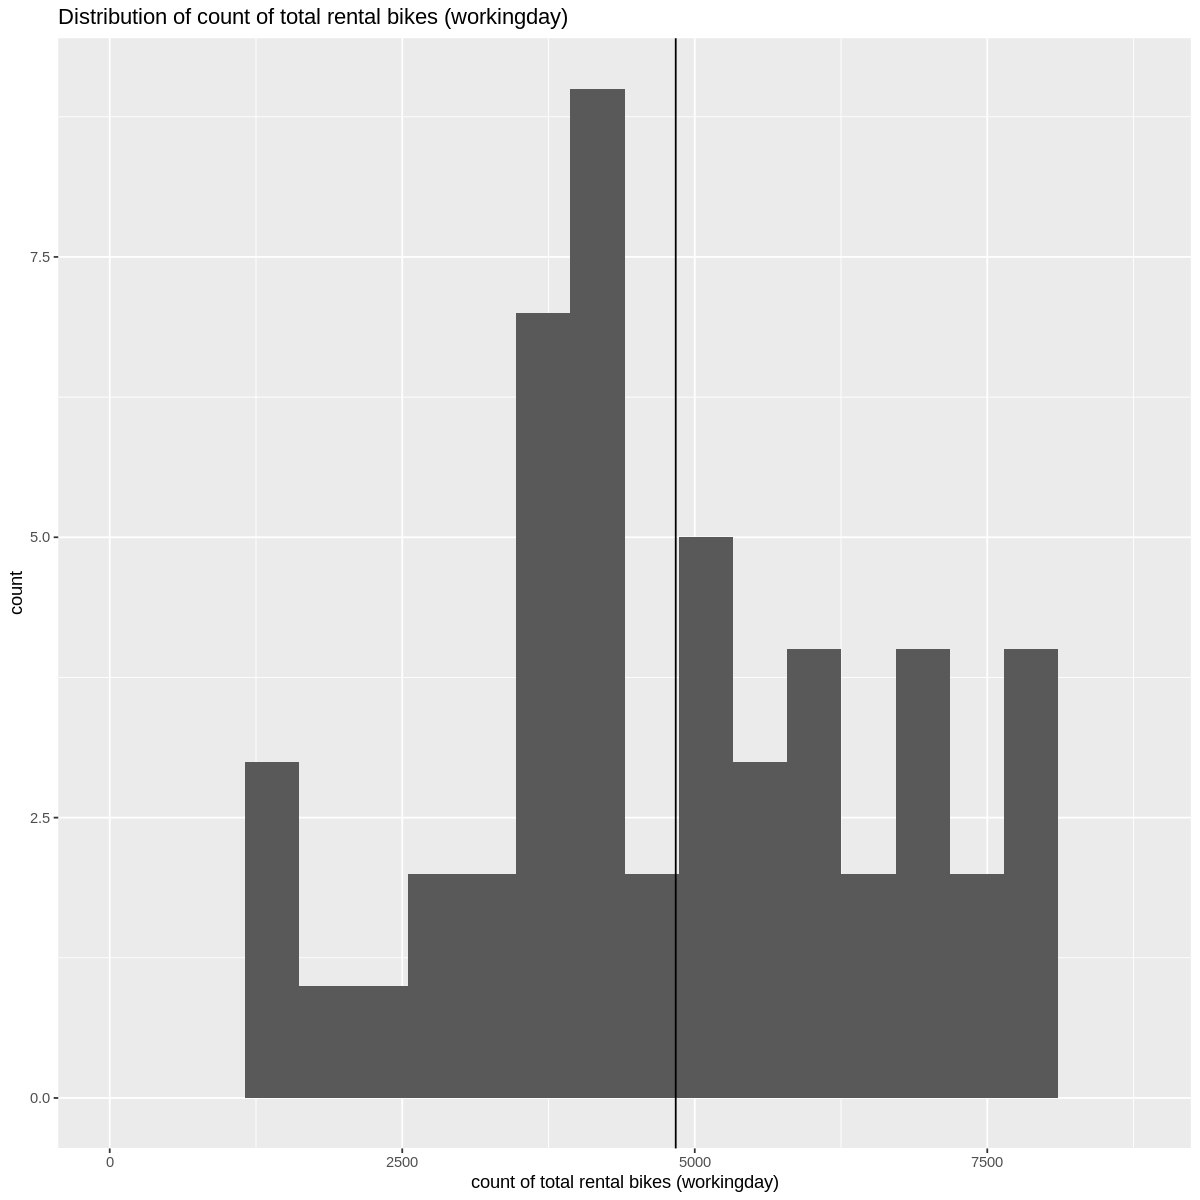

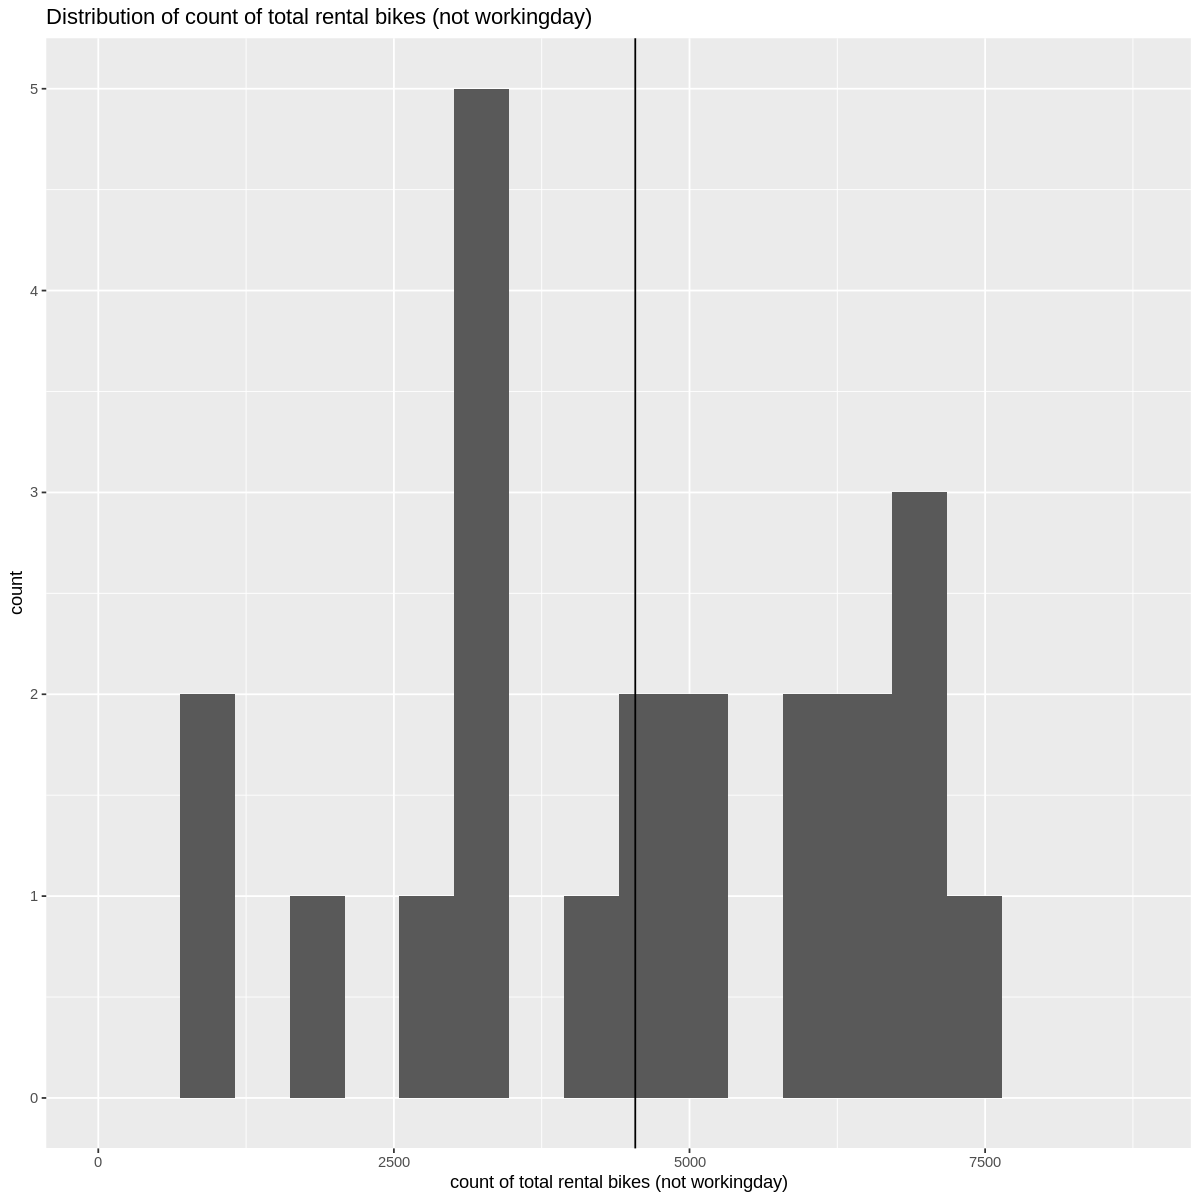

In [4]:
# historgram for all bike sharing data
all_BikeSharingData_hist <- ggplot(BikeSharingData, 
                                   aes(x = cnt, fill = isworkingday)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes", fill="Is Workingday?") +
  ggtitle("Distribution of count of total rental bikes") +
  geom_vline(xintercept = mean(BikeSharingData$cnt)) +
  theme(legend.position="top") +
  xlim(0, 8800)
  
all_BikeSharingData_hist

# histogram for all biking sharing data during the non-working days
holiday_BikeSharingData_hist <- ggplot(workingday_BikeSharingData, aes(x = cnt)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes (workingday)") +
  ggtitle("Distribution of count of total rental bikes (workingday)") +
  geom_vline(xintercept = mean(workingday_BikeSharingData$cnt)) +
   xlim(0, 8800)

  
holiday_BikeSharingData_hist

# histogram for all biking sharing data during workdays
notHoliday_BikeSharingData_hist <- ggplot(notworkingday_BikeSharingData, aes(x = cnt)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes (not workingday)") +
  ggtitle("Distribution of count of total rental bikes (not workingday)")+
  geom_vline(xintercept = mean(notworkingday_BikeSharingData$cnt)) +
  xlim(0, 8800)
notHoliday_BikeSharingData_hist

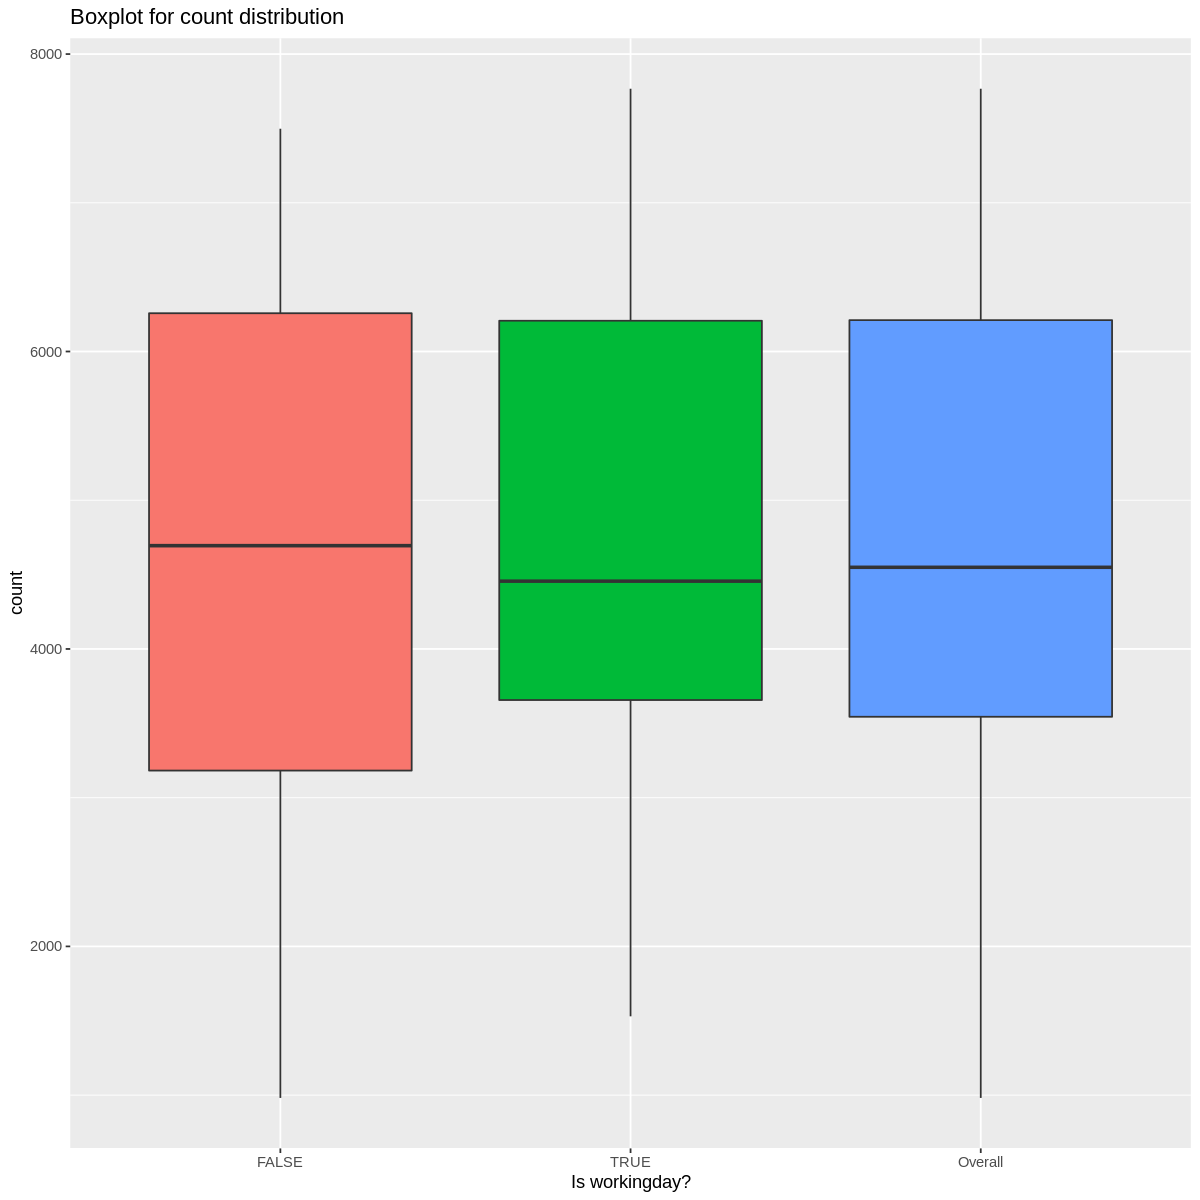

In [5]:
# boxplot using the raw data
boxplot <- ggplot(
    rbind(BikeSharingData, BikeSharingData %>% mutate(isworkingday="Overall")), 
    aes(x=isworkingday, y=cnt, fill=isworkingday)) +
    geom_boxplot() +
    theme(legend.position="none",) +
    labs(x="Is workingday?", 
         y="count",
         fill = "") +
    ggtitle("Boxplot for count distribution")
boxplot

In [6]:
#present the location parameter(mean) and the scale parameter(standard deviation)
parameters <- rbind(BikeSharingData, BikeSharingData %>% mutate(isworkingday="Overall")) %>%
    group_by(isworkingday) %>%
    summarize(mean= mean(cnt), 
              sd= sd(cnt))
parameters

isworkingday,mean,sd
<fct>,<dbl>,<dbl>
FALSE,4541.364,1997.093
TRUE,4837.294,1756.747
Overall,4748.110,1823.496


## Methods: Plan ##

- Our plan for the project is to conduct a hypothesis test to determine if there is a **significant difference** in the number of registered bike users during weekdays (wk) and workdays (wr). Thus, for our project, our null hypothesis will be wk=wr and our alternate hypothesis will be  wk not equal to wr.  The significance level we plan to use in our study is 5% significance level. 

- We expect to find a significant difference in our results as we expect the number of users to be **higher** during workdays as compared to weekends. We believe that more people will make use of the Bike Sharing services during Workdays to commute to work and as Workdays are in general busier when compared to Weekends. 

- Such findings could have significant impact on the business model of the company providing Bike Sharing Services. If it is proven that their services have more demand during the Workdays then they will need to meet up with the increase in demand during Workdays by increasing the supply of available shared bikes during Workdays.

- Some future questions that this study could lead to are : 1. Do seasons affect the number of Bike Users? and 2. Does the time of the day have an impact on the Number of Bike Users?

## Reference ##

Bike Sharing Dataset Data Set . UCI Machine Learning Repository: Bike sharing dataset data set. (n.d.). Retrieved October 31, 2022, from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset 

Zhang, S., He, K., Dong, S., &amp; Zhou, J. (2016, February 15). Modeling the distribution characteristics of urban public bicycle rental duration. Discrete Dynamics in Nature and Society. Retrieved October 26, 2022, from https://www.hindawi.com/journals/ddns/2016/8947525/ 

Yang, L., Shen, Q., &amp; Li, Z. (2016, July 19). Comparing travel mode and trip chain choices between holidays and weekdays. Transportation Research Part A: Policy and Practice. Retrieved October 26, 2022, from https://www.sciencedirect.com/science/article/pii/S0965856416301781 